Библиотеки которые можно использовать: librosa, NMFToolbox, Nimfa, Mido/Pretty_midi,MIDIUtil.

Из всех библиотек с реализацией NMF пока остановился на Nimfa, не пойдет с ней - буду пробовать работать с NMFToolbox. Перед тем как запускать код дальше надо установить Nimfa.

In [3]:
pip install nimfa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.5 MB/s eta 0:00:00


**Читаем исходный файл**

In [12]:
from scipy.io import wavfile
import numpy as np
import librosa
import nimfa
gamma = 100
f_s, x = wavfile.read("/content/FChopinPreludeOp28n4.wav")
print(f_s)        # sample rate
print(x.dtype)   # int16, int32, etc.
print(x.shape)   # (N,) mono or (N, channels)
print(x[100000])
'''def init_nmf_template_pitch(K, pitch_set, freq_res, tol_pitch=0.05):
    """Initializes template matrix for a given set of pitches

    Notebook: C8/C8S3_NMFSpecFac.ipynb

    Args:
        K (int): Number of frequency points
        pitch_set (np.ndarray): Set of fundamental pitches
        freq_res (float): Frequency resolution
        tol_pitch (float): Relative frequency tolerance for the harmonics (Default value = 0.05)

    Returns:
        W (np.ndarray): Nonnegative matrix of size K x R with R = len(pitch_set)
    """
    R = len(pitch_set)
    W = np.zeros((K, R))
    for r in range(R):
        W[:, r] = template_pitch(K, pitch_set[r], freq_res, tol_pitch=tol_pitch)
    return W'''
def init_nmf_template_pitch_onset(K, pitch_set, freq_res, tol_pitch=0.05):
    """Initializes template matrix with onsets for a given set of pitches

    Notebook: C8/C8S3_NMFSpecFac.ipynb

    Args:
        K (int): Number of frequency points
        pitch_set (np.ndarray): Set of fundamental pitches
        freq_res (float): Frequency resolution
        tol_pitch (float): Relative frequency tolerance for the harmonics (Default value = 0.05)

    Returns:
        W (np.ndarray): Nonnegative matrix of size K x (2R) with R = len(pitch_set)
    """
    R = len(pitch_set)
    W = np.zeros((K, 2*R))
    for r in range(R):
        W[:, 2*r] = 0.1
        W[:, 2*r+1] = template_pitch(K, pitch_set[r], freq_res, tol_pitch=tol_pitch)
    return W
def template_pitch(K, pitch, freq_res, tol_pitch=0.05):
    """Defines spectral template for a given pitch

    Notebook: C8/C8S3_NMFSpecFac.ipynb

    Args:
        K (int): Number of frequency points
        pitch (float): Fundamental pitch
        freq_res (float): Frequency resolution
        tol_pitch (float): Relative frequency tolerance for the harmonics (Default value = 0.05)

    Returns:
        template (np.ndarray): Nonnegative template vector of size K
    """
    max_freq = K * freq_res
    pitch_freq = 2**((pitch - 69) / 12) * 440
    max_order = int(np.ceil(max_freq / ((1 - tol_pitch) * pitch_freq)))
    #print(max_freq,pitch_freq,max_order)
    template = np.zeros(K)
    for m in range(1, max_order + 1):
        min_idx = max(0, int((1 - tol_pitch) * m * pitch_freq / freq_res))
        max_idx = min(K-1, int((1 + tol_pitch) * m * pitch_freq / freq_res))
        template[min_idx:max_idx+1] = 1 / m
    return template
'''def pitch(p):
  return 2**((p-69)/12) * 440
def interval(freq, cents=20):
  return (freq * 2 ** (-cents/1200), freq * 2 ** (cents/1200))'''
if(x.dtype==np.int32):
  x = x / (2**31)
elif(x.dtype==np.int16):
  x = x / (2**15)
else:
  raise ValueError(f"Unsupported sample type: {x.dtype}")
spectrogram = np.abs(librosa.stft(x, n_fft=2048,hop_length=1024))
spectrogram_compressed = np.log(1+gamma*spectrogram)
print(x[100000])
print(np.min(spectrogram_compressed),np.max(spectrogram_compressed))
print(spectrogram_compressed.shape)
pitches = [x+21 for x in range(88)]
freq_res = f_s/(2 * 1025)
print(freq_res)
W_temp = init_nmf_template_pitch_onset(1025,pitches,freq_res)
H_temp = np.random.rand(88*2, spectrogram_compressed.shape[1])
#nmf = nimfa.Nmf(spectrogram_compressed, seed='fixed', W=W_temp)
nmf = nimfa.Nmf(
    spectrogram_compressed,
    rank=88*2,
    seed='fixed',
    W=W_temp,
    H=H_temp,
    max_iter=200,
    beta=1, sparsity=(None, 0.2)
)
nmf_fit = nmf()
W_est = nmf_fit.basis()
H_est = nmf_fit.coef()

/tmp/ipython-input-3069712466.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  f_s, x = wavfile.read("/content/FChopinPreludeOp28n4.wav")


44100
int16
(5556600,)
-3447
-0.105194091796875
5.323435231344913e-06 10.672143537149704
(1025, 5427)
21.51219512195122


In [ ]:
m = template_pitch(K=1025,pitch=69,freq_res=1)
print(type(m))
print(np.max(m))

NameError: name 'template_pitch' is not defined

In [ ]:
pitches = [x+21 for x in range(88)]
print(pitches)

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]


In [6]:
!grep -rl "np.mat" /usr/local/lib/python3.12/dist-packages/nimfa | xargs sed -i 's/np.mat/np.asmatrix/g'

In [8]:
!grep -rl "asmatrixrix" /usr/local/lib/python3.12/dist-packages/nimfa | xargs sed -i 's/asmatrixrix/asmatrix/g'


In [ ]:
!grep -R "asmatrixrix" /usr/local/lib/python3.12/dist-packages/nimfa

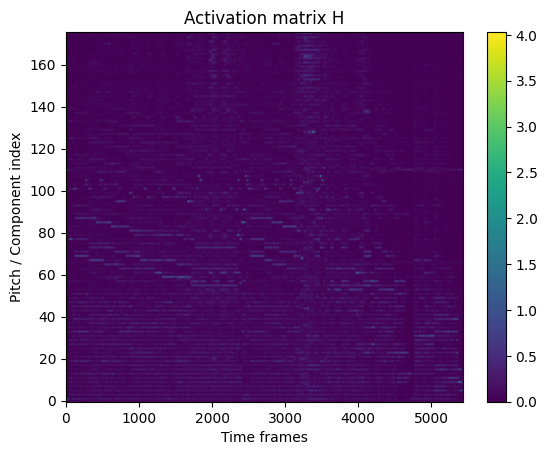

In [45]:
#print(W_est.shape)
#print(H_est[:,100])
import matplotlib.pyplot as plt
#H_est_visualisation = np.log(1+10*H_est)
from scipy.signal import butter, filtfilt

b, a = butter(2, 0.1)   # low-pass along time
#H_est_visualisation = filtfilt(b, a, H_est, axis=1)
#H_est_visualisation = np.log(1+10*H_est[1::2,:])
#H_est_visualisation = filtfilt(b, a, H_est_visualisation, axis=1)
plt.figure()
plt.imshow(H_est, aspect='auto', origin='lower')
plt.colorbar()
plt.title("Activation matrix H")
plt.xlabel("Time frames")
plt.ylabel("Pitch / Component index")
plt.show()

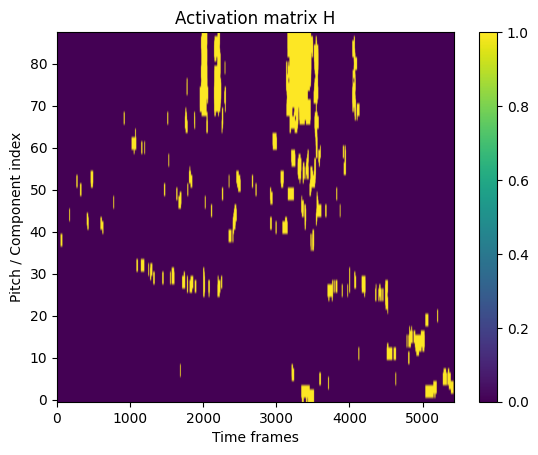

In [71]:
import numpy as np
from scipy.signal import medfilt
from scipy.ndimage import gaussian_filter1d, binary_opening, binary_closing, label
from scipy.ndimage import generate_binary_structure

def mad(a):
    """Median absolute deviation (robust scale)."""
    m = np.median(a)
    return np.median(np.abs(a - m))

def track_notes_fixed(H,
                      sr=None, hop_length=None,
                      sigma_t=2.5,        # frames: temporal smoothing
                      sigma_p=0.8,        # pitches: pitch-axis smoothing
                      per_pitch_k=1.2,    # threshold factor (uses MAD)
                      med_kernel=(3, 17), # (pitch, time) odd sizes
                      morph_iterations_open=1,
                      morph_iterations_close=1,
                      min_dur_s=0.08,
                      merge_gap_s=0.03):
    """
    Robust note tracker for activation matrix H (K x T).
    Returns:
      piano_roll: binary K x T
      notes: list of dicts {'pitch_idx','onset','offset','score'}
    """
    Hf = H.astype(float).copy()
    K, T = Hf.shape

    # --- 1) smoothing (gaussian) ------------------------------------------------
    if sigma_t > 0:
        Hf = gaussian_filter1d(Hf, sigma=sigma_t, axis=1, mode='reflect')
    if sigma_p > 0:
        Hf = gaussian_filter1d(Hf, sigma=sigma_p, axis=0, mode='reflect')

    # --- 2) per-pitch robust threshold (median + k * MAD) -----------------------
    # compute median and MAD per pitch (row)
    medians = np.median(Hf, axis=1)
    mads = np.array([mad(Hf[i]) for i in range(K)])
    # avoid zero MAD
    mads[mads == 0] = np.std(Hf, axis=1)[mads == 0] + 1e-12
    thr = medians + per_pitch_k * mads
    Hbin = (Hf > thr[:, None])

    # --- 3) 2D median filter: ensure odd kernel sizes ---------------------------
    pk, tk = med_kernel
    if pk % 2 == 0: pk += 1
    if tk % 2 == 0: tk += 1
    Hbin = medfilt(Hbin.astype(np.uint8), kernel_size=(pk, tk)).astype(bool)

    # --- 4) morphological opening/closing (boolean + explicit struct) ----------
    # use a small 2D structure to allow connectivity in pitch and time
    struct = generate_binary_structure(2, 1)  # 3x3 connectivity kernel
    # expand the struct to desired shape by convolving (approx) via ones
    # here we'll build a rectangular structure shape (p_pitch x p_time)
    p_struct = (3, max(3, tk//3))
    struct_rect = np.ones(p_struct, dtype=bool)
    for _ in range(morph_iterations_open):
        Hbin = binary_opening(Hbin, structure=struct_rect)
    for _ in range(morph_iterations_close):
        Hbin = binary_closing(Hbin, structure=struct_rect)

    # --- 5) label 2D connected components and extract note events ---------------
    labeled, ncomp = label(Hbin, structure=struct_rect)
    piano_roll = np.zeros_like(Hbin, dtype=np.uint8)
    notes = []

    # helper conversions
    if sr is not None and hop_length is not None:
        frames_to_seconds = lambda f: f * hop_length / sr
        seconds_to_frames = lambda s: int(round(s * sr / hop_length))
    else:
        frames_to_seconds = lambda f: f  # identity if unknown
        seconds_to_frames = lambda s: int(round(s))

    min_dur_frames = max(1, seconds_to_frames(min_dur_s))
    merge_gap_frames = seconds_to_frames(merge_gap_s)

    for comp_id in range(1, ncomp + 1):
        ys, xs = np.where(labeled == comp_id)  # ys = pitch indices, xs = time indices
        if xs.size == 0:
            continue
        onset = xs.min()
        offset = xs.max()
        dur = offset - onset + 1
        if dur < min_dur_frames:
            continue

        # compute representative pitch: weighted by Hf (mean energy per pitch)
        pitch_means = [Hf[y, xs].mean() for y in np.unique(ys)]
        unique_pitches = np.unique(ys)
        best_pitch_idx = unique_pitches[int(np.argmax(pitch_means))]
        score = float(Hf[best_pitch_idx, onset:offset+1].mean())

        # fill piano roll for this pitch and interval (clamp to bounds)
        piano_roll[best_pitch_idx, onset:offset+1] = 1

        notes.append({
            'pitch_idx': int(best_pitch_idx),
            'onset': int(onset),
            'offset': int(offset),
            'score': score
        })

    # --- 6) merge close events of the same pitch --------------------------------
    notes_sorted = sorted(notes, key=lambda n: (n['pitch_idx'], n['onset']))
    merged = []
    for n in notes_sorted:
        if not merged or merged[-1]['pitch_idx'] != n['pitch_idx']:
            merged.append(n.copy())
            continue
        prev = merged[-1]
        if n['onset'] - prev['offset'] <= merge_gap_frames:
            prev['offset'] = max(prev['offset'], n['offset'])
            prev['score'] = max(prev['score'], n['score'])
        else:
            merged.append(n.copy())
    notes = merged

    # rebuild piano_roll from merged notes
    piano_roll = np.zeros_like(piano_roll)
    for n in notes:
        piano_roll[n['pitch_idx'], n['onset']:n['offset']+1] = 1

    return piano_roll, notes, Hf, thr  # return Hf and thr for debugging/visualization
#H_est_vis = note_tracking(H_est_visualisation)
res = track_notes(H_est[1::2])
#print(res[0].shape)
#H_est_vis = note_tracking_simple(H_est)
plt.figure()
#plt.imshow(H_est[1::2,],aspect='auto', origin='lower')
plt.imshow(res[0],aspect='auto', origin='lower')
plt.colorbar()
plt.title("Activation matrix H")
plt.xlabel("Time frames")
plt.ylabel("Pitch / Component index")
plt.show()

In [42]:
tempo, beats = librosa.beat.beat_track(y=x, sr=f_s)

tempo = float(tempo)          # or: tempo = tempo.item()

print(f"Estimated tempo: {tempo:.2f} BPM")

beat_times = librosa.frames_to_time(beats, sr=f_s)
print(f"Beat positions (sec.): {beat_times}")

Estimated tempo: 107.67 BPM
Beat positions (sec.): [ 0.99845805  1.56734694  2.13623583  2.55419501  3.14630385  3.7384127
  4.31891156  4.89941043  5.4799093   6.06040816  6.64090703  7.2214059
  7.80190476  8.38240363  8.96290249  9.54340136 10.11229025 10.68117914
 11.23845805 11.79573696 12.35301587 12.91029478 13.4675737  14.02485261
 14.58213152 15.13941043 15.68507937 16.2307483  16.77641723 17.32208617
 17.8677551  18.41342404 18.95909297 19.5047619  20.05043084 20.63092971
 21.19981859 21.78031746 22.34920635 22.92970522 23.51020408 24.09070295
 24.65959184 25.2400907  25.82058957 26.40108844 26.9815873  27.56208617
 28.14258503 28.71147392 29.28036281 29.8492517  30.40653061 30.98702948
 31.56752834 32.14802721 32.72852608 33.29741497 33.86630385 34.44680272
 35.02730159 35.60780045 36.18829932 36.75718821 37.3260771  37.89496599
 38.46385488 39.03274376 39.60163265 40.15891156 40.72780045 41.28507937
 41.8307483  42.41124717 42.96852608 43.52580499 44.12952381 44.72163265
 4

/tmp/ipython-input-3247953737.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo = float(tempo)          # or: tempo = tempo.item()


Text(0.5, 1.0, 'Smoothed H (time)')

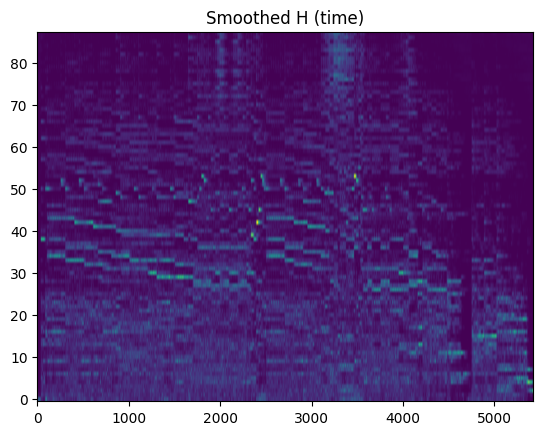

In [70]:
plt.imshow(
    gaussian_filter1d(H_est[1::2,], sigma=2.5, axis=1),
    aspect='auto', origin='lower'
)
plt.title("Smoothed H (time)")